In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [40]:
df = pd.read_csv('../datasets/df_before_one_hot_encoding.csv')
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


**There are several observations made in the real estate world:**
- Ensure each BHK has at least 225 sqft. So, the total minimum area for a house should be 225×BHK.
- The number of bathrooms should not exceed BHK + 1.
- Since the primary focus is on 2BHK and 3BHK homes, filter out any other configurations.
- Assuming the price_per_sqft column follows a normal distribution, identify and remove outliers using statistical methods.
- Remove higher BHK homes that are priced lower than similar lower BHK homes in the same location.

In [41]:
df = df[((df['total_sqft'] / (df['BHK'])) >= 225) & ~(df['BHK'] == 0)]

In [42]:
df.shape

(12703, 6)

In [43]:
df = df[df['bath'] <= (df['BHK'] + 1)]

In [44]:
df.shape

(12543, 6)

In [45]:
bhk_counts = df['BHK'].value_counts()
bhk_filtered = bhk_counts[bhk_counts > 100]
bhk_values = bhk_filtered.index
bhk_list = bhk_values.tolist()
bhk_list

[2, 3, 4, 1, 5, 6]

In [46]:
df = df[df['BHK'].isin(bhk_list)]

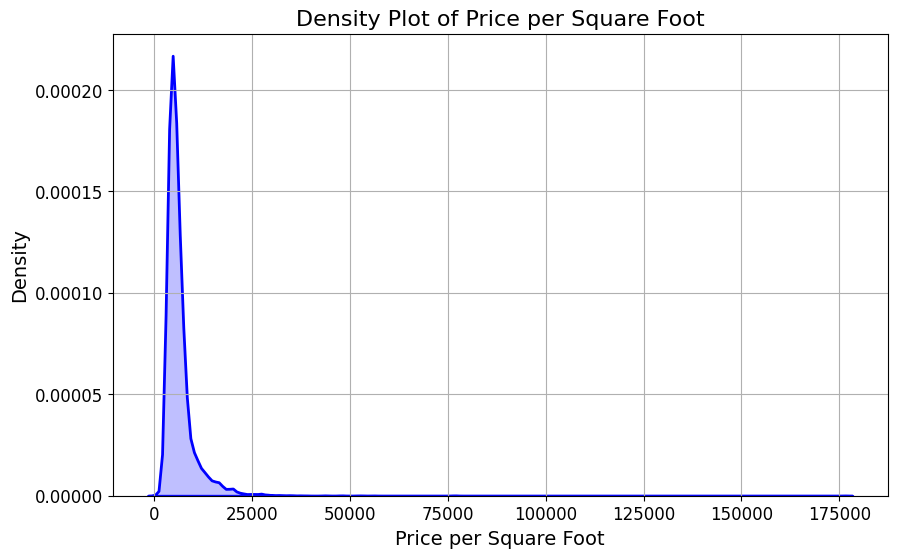

In [47]:
plt.figure(figsize=(10, 6))
kde_plot = sns.kdeplot(data=df, x='price_per_sqft', color='blue', fill=True, linewidth=2)

plt.title('Density Plot of Price per Square Foot', fontsize=16)
plt.xlabel('Price per Square Foot', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)

plt.show()

In [48]:
df['price_per_sqft'].describe()

count     12441.000000
mean       6334.661328
std        4140.173483
min         267.829813
25%        4211.469534
50%        5300.000000
75%        6956.136464
max      176470.588235
Name: price_per_sqft, dtype: float64

<Figure size 1000x600 with 0 Axes>

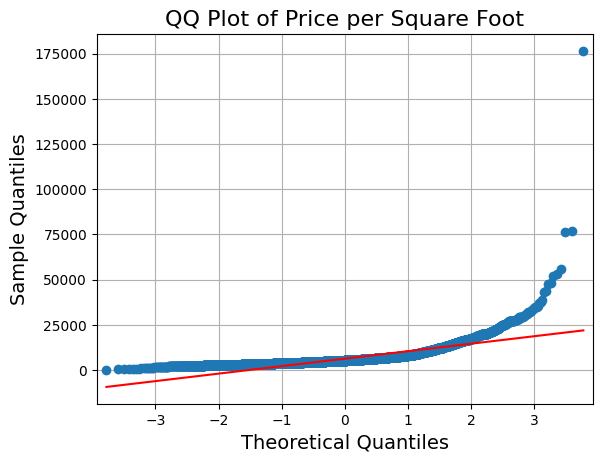

In [49]:
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
qq_plot = sm.qqplot(df['price_per_sqft'], line='s')

plt.title('QQ Plot of Price per Square Foot', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.grid(True)

plt.show()

**The KDE Plot shows that the data is right-skewed.**

**The QQ Normal Plot shows that the data is normally distributed but is right skewed.**

**There are 2 ways in tackling these outliers :**
- Outliers based on interquartile range.
- Keep data with the range of mean + standard deviation.
- We have used the first method.

In [50]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

In [51]:
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range (IQR):", IQR)

Q1 (25th percentile): 4211.469534050179
Q3 (75th percentile): 6956.136464333185
Interquartile Range (IQR): 2744.666930283006


In [52]:
(df['price_per_sqft'] < (Q1 - 1.5 * IQR)).sum()

0

In [53]:
(df['price_per_sqft'] > (Q3 + 1.5 * IQR)).sum()

1019

In [54]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

In [55]:
mean,std

(6334.661327813622, 4140.173482536829)

In [56]:
(df['price_per_sqft'] > (mean + std)).sum()

1166

In [57]:
(df['price_per_sqft'] < (mean - std)).sum()

44

In [58]:
df = df[~((df['price_per_sqft'] < (Q1 - 1.5 * IQR)) | (df['price_per_sqft'] > (Q3 + 1.5 * IQR)))]

In [59]:
df.shape

(11422, 6)

In [60]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


**Now we will write a function to plot 2 and 3 BHK prices of a particular region, and since the number of 2 and 3 BHK dominate others, we will only use 2 and 3 BHK in our function.**

In [61]:
def df_bhk_i(df,bhk):
    df_bhk_i = df[df['BHK'].isin(bhk)]
    return df_bhk_i

In [62]:
df_bhk_i(df,[2,3])

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
...,...,...,...,...,...,...
13191,Rachenahalli,1050.0,2.0,52.71,2,5020.000000
13193,Bellandur,1262.0,2.0,47.00,2,3724.247227
13194,Uttarahalli,1345.0,2.0,57.00,3,4237.918216
13195,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245


In [63]:
def price_bhk_plot(df,location):
    bhk_2_3 = df_bhk_i(df,[2,3])
    df_location = bhk_2_3[bhk_2_3['location'] == location]
    avg_price_2BHK = df_location[df_location['BHK'] == 2]['price'].mean()
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_location,x = 'total_sqft',y = 'price',hue = 'BHK',palette='coolwarm', s=100, edgecolor='w', alpha=0.7)
    plt.title(f'Prices of 2BHK and 3BHK Homes in {location}', fontsize=16)
    plt.xlabel('Total Square Feet', fontsize=14)
    plt.ylabel('Price(in lacs)', fontsize=14)
    plt.axhline(avg_price_2BHK,color = 'black',linestyle = '--',label=f'2BHK Avg Price: {avg_price_2BHK:.2f}')
    plt.legend(title='BHK', fontsize=12, title_fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

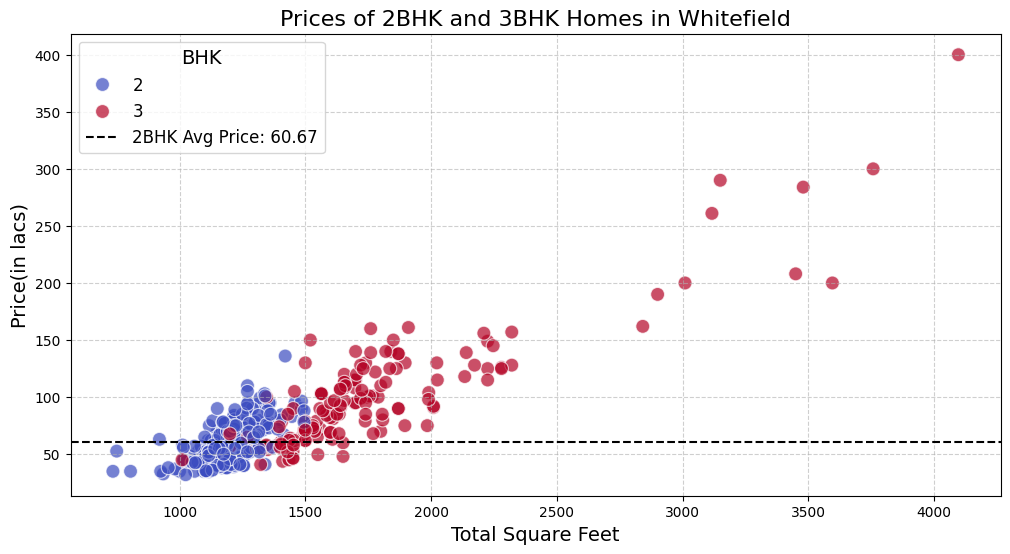

In [64]:
price_bhk_plot(df,'Whitefield')

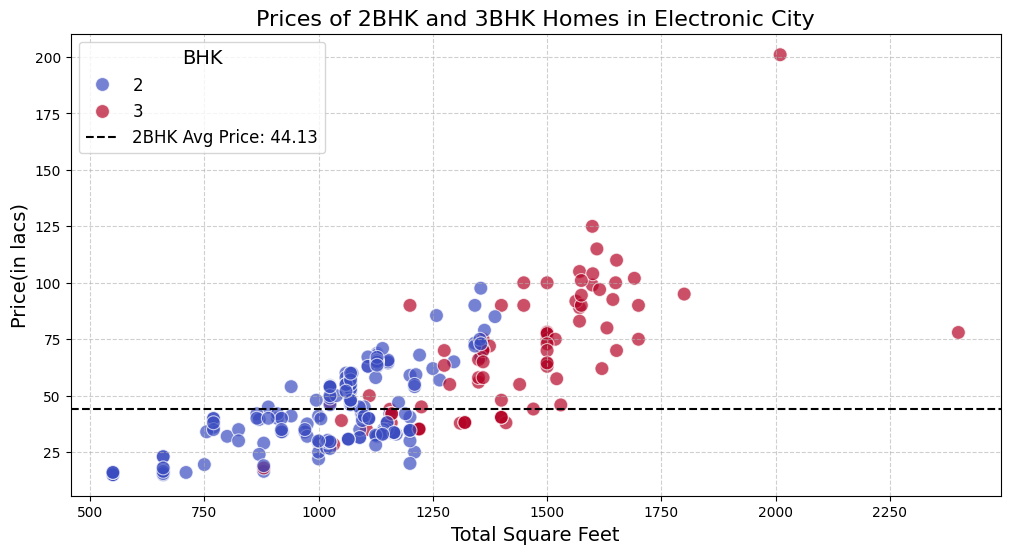

In [86]:
price_bhk_plot(df,'Electronic City')

In [69]:
df1 = df.copy()

In [70]:
def bhk_outlier(df,location):
    bhk_2_3 = df_bhk_i(df,[2,3])
    df_location = bhk_2_3[bhk_2_3['location'] == location]
    avg_price_2BHK = df_location[df_location['BHK'] == 2]['price'].mean()
    bhk_3 = df_bhk_i(df,[3])
    bhk3_remove = bhk_3[bhk_3['price'] < avg_price_2BHK].index
    df.drop(bhk3_remove,inplace=True)
    return df

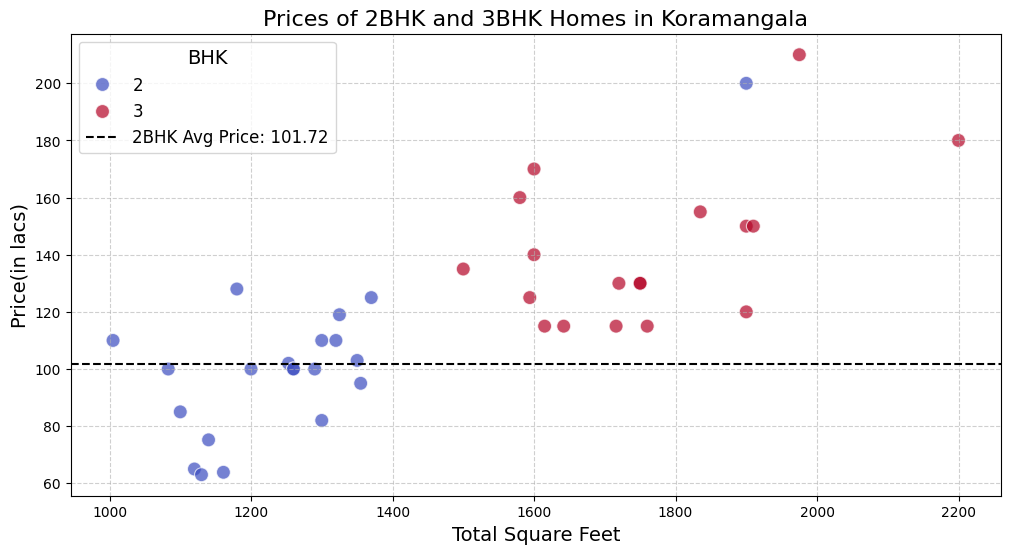

In [71]:
price_bhk_plot(bhk_outlier(df1,'Koramangala'),'Koramangala')

In [73]:
df2 = df.copy()

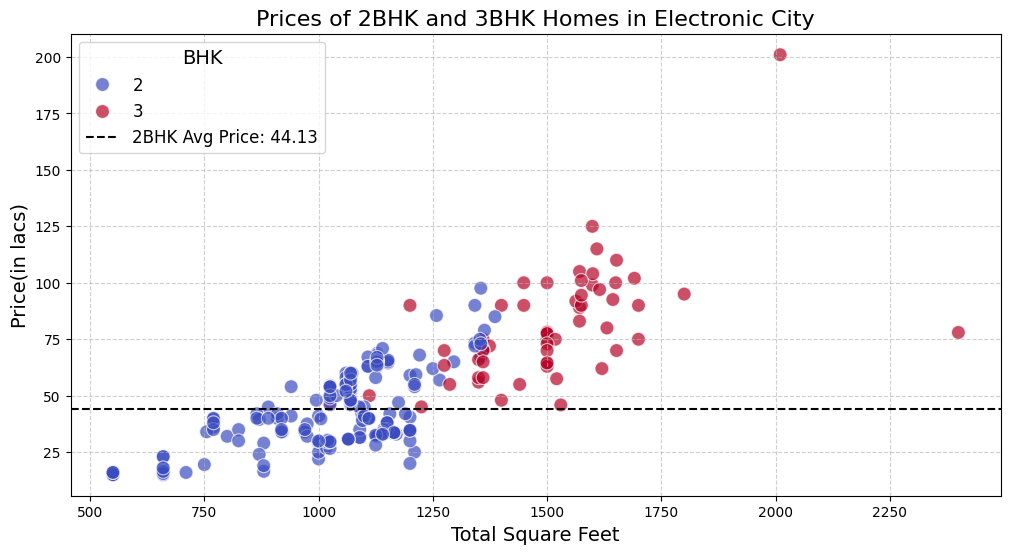

In [74]:
price_bhk_plot(bhk_outlier(df2,'Electronic City'),'Electronic City')

In [111]:
df_original = df.copy()

In [113]:
def remove_bhk_outliers(df):
    outlier_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_statistics = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_statistics[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            # Get statistics for the previous BHK type (if available and count > 5)
            stats = bhk_statistics.get(bhk - 1)
            if stats and stats['count'] > 5:
                # Exclude indices of flats whose price_per_sqft is less than the mean of the previous BHK type
                outlier_indices = np.append(outlier_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(outlier_indices, axis='index')

df_cleaned = remove_bhk_outliers(df_original)


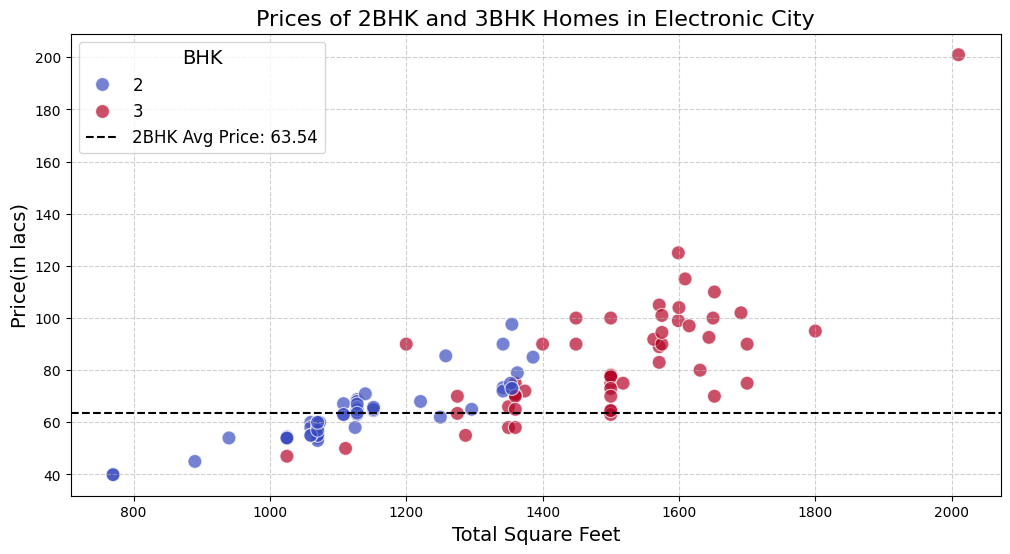

In [114]:
price_bhk_plot(df_cleaned,'Electronic City')

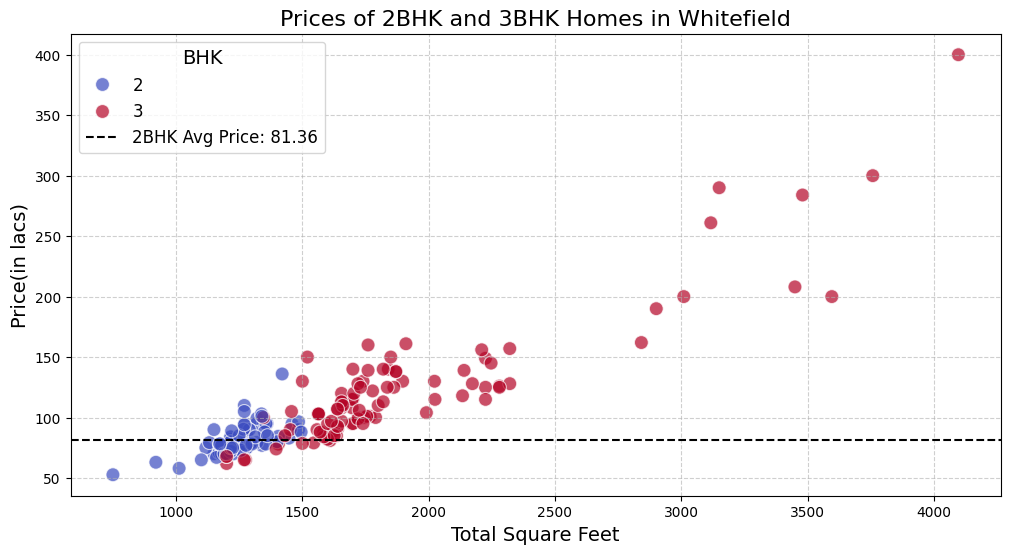

In [115]:
price_bhk_plot(df_cleaned,'Whitefield')

In [116]:
df_cleaned.shape

(8252, 6)

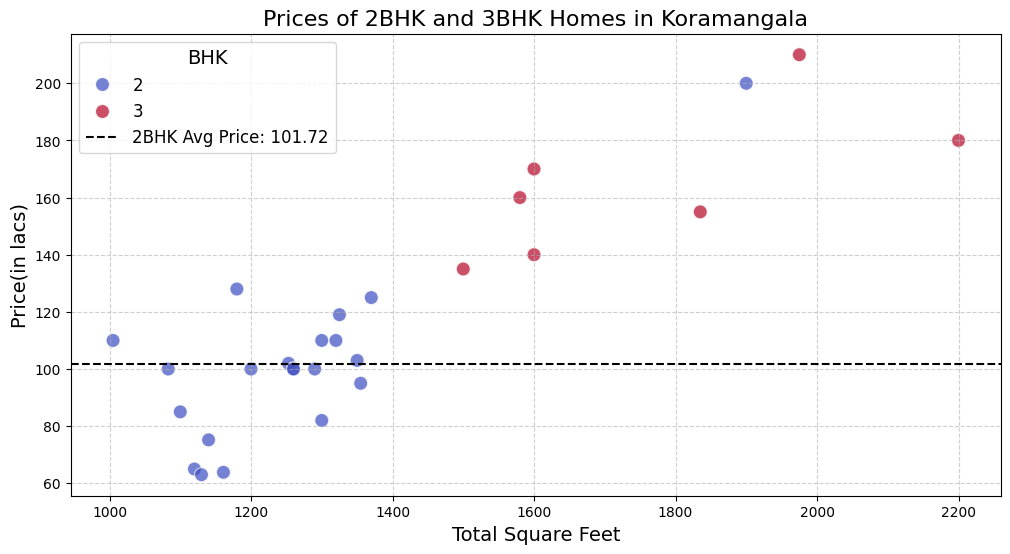

In [117]:
price_bhk_plot(df_cleaned,'Koramangala')

In [118]:
df_cleaned.to_csv('../datasets/df_after_feature_selection.csv',index=False)